<a href="https://colab.research.google.com/github/simecek/dspracticum2023/blob/main/lesson04/HF_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🤗 demo

## Pipelines

In [2]:
# Note: not tested on Colab, just installation suggestions
!pip install -qq transformers diffusers ffmpeg accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 89.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 70.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 83.0 MB/s eta 0:00:00


In [3]:
from transformers import pipeline

In [4]:
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-6-6")

In [5]:
text = """The Prague Spring (Czech: Pražské jaro, Slovak: Pražská jar) was a period of political liberalization and mass protest in the Czechoslovak Socialist Republic. It began on 5 January 1968, when reformist Alexander Dubček was elected First Secretary of the Communist Party of Czechoslovakia (KSČ), and continued until 21 August 1968, when the Soviet Union and most of Warsaw Pact members invaded the country to suppress the reforms.

The Prague Spring reforms were a strong attempt by Dubček to grant additional rights to the citizens of Czechoslovakia in an act of partial decentralization of the economy and democratization. The freedoms granted included a loosening of restrictions on the media, speech and travel. After national discussion of dividing the country into a federation of three republics, Bohemia, Moravia-Silesia and Slovakia, Dubček oversaw the decision to split into two, the Czech Socialist Republic and Slovak Socialist Republic.[1] This dual federation was the only formal change that survived the invasion.

The reforms, especially the decentralization of administrative authority, were not received well by the Soviets, who, after failed negotiations, sent half a million Warsaw Pact troops and tanks to occupy the country. The New York Times cited reports of 650,000 men equipped with the most modern and sophisticated weapons in the Soviet military catalogue.[2] A massive wave of emigration swept the nation. Resistance was mounted throughout the country, involving attempted fraternization, sabotage of street signs, defiance of curfews, etc. While the Soviet military had predicted that it would take four days to subdue the country, the resistance held out for eight months until diplomatic maneuvers finally circumvented it. It became a high-profile example of civilian-based defense; there were sporadic acts of violence and several protest suicides by self-immolation (the most famous being that of Jan Palach), but no military resistance. Czechoslovakia remained controlled by the Soviet Union until 1989, when the Velvet Revolution peacefully ended the communist regime; the last Soviet troops left the country in 1991.

After the invasion, Czechoslovakia entered a period known as normalization (Czech: normalizace, Slovak: normalizácia), in which new leaders attempted to restore the political and economic values that had prevailed before Dubček gained control of the KSČ. Gustáv Husák, who replaced Dubček as First Secretary and also became President, reversed almost all of the reforms. The Prague Spring inspired music and literature including the work of Václav Havel, Karel Husa, Karel Kryl and Milan Kundera's novel The Unbearable Lightness of Being."""

In [6]:
summarizer(text)

[{'summary_text': ' The Prague Spring was a period of political liberalization and mass protest in the Czechoslovak Socialist Republic . It began on 5 January 1968, when reformist Alexander Dubček was elected First Secretary of the Communist Party of Czechoslovakia (KSČ) The Soviet Union and most of Warsaw Pact members invaded the country to suppress'}]

In [7]:
pipe = pipeline("text-classification")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [8]:
pipe("This restaurant is awesome")

[{'label': 'POSITIVE', 'score': 0.9998743534088135}]

In [9]:
pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment")

In [10]:
pipe("This restaurant is awesome")

[{'label': 'LABEL_2', 'score': 0.9902701377868652}]

In [11]:
len(text)

2692

In [12]:
pipe(text[:2000])

[{'label': 'LABEL_1', 'score': 0.5484036207199097}]

In [13]:
pipe2 = pipeline("text-classification", model="michellejieli/emotion_text_classifier")

In [14]:
pipe2('Phew! This is awesome shit!')

[{'label': 'joy', 'score': 0.988045871257782}]

In [15]:
pipe2(text[:2000])

[{'label': 'neutral', 'score': 0.7701616883277893}]

## Tokenizers and models

In [16]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification

In [17]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [18]:
model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

In [19]:
tokenizer("Using a Transformer network is simple")

{'input_ids': [101, 2478, 1037, 10938, 2121, 2897, 2003, 3722, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [20]:
tokenizer.encode("Using a Transformer network is simple")

[101, 2478, 1037, 10938, 2121, 2897, 2003, 3722, 102]

In [21]:
tokenizer.decode(_)

'[CLS] using a transformer network is simple [SEP]'

In [22]:
model_inputs = tokenizer("Using a Transformer network is rather boring and complicated", padding=True, return_tensors="pt")

model_inputs

{'input_ids': tensor([[  101,  2478,  1037, 10938,  2121,  2897,  2003,  2738, 11771,  1998,
          8552,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
output = model(**model_inputs)

output

SequenceClassifierOutput(loss=None, logits=tensor([[ 4.4517, -3.6399]], grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)

In [ ]:
from scipy.special import softmax

def is_promoter(model_outputs, categories):
    logits = model_outputs['logits'].detach().numpy()
    probs = softmax(logits, axis=1)[0]
    probs = map(float, probs)

    return dict(zip(categories, probs))

In [ ]:
is_promoter(output, ['negative', 'postitive'])

{'negative': 0.9996939897537231, 'postitive': 0.0003059815790038556}

In [ ]:
import numpy as np

logits = output['logits'].detach().numpy()[0,:]
np.exp(logits) / (np.sum(np.exp(logits)))

## More demo

### Stable Diffusion (Text-to-image)

In [23]:
import torch
from diffusers import StableDiffusionPipeline

In [24]:
from huggingface_hub import notebook_login
# from huggingface_hub.hf_api import HfFolder; HfFolder.save_token('YOUR_HF_TOKEN_HERE')

notebook_login()

In [25]:
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)
pipe = pipe.to("cuda")

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [26]:
%%time
prompt = "painted portrait of rugged zeus, god of thunder, greek god, white hair, masculine, mature, handsome, upper body, muscular, hairy torso, fantasy, intricate, elegant, highly detailed, digital painting, artstation, concept art, smooth, sharp focus, illustration, art by gaston bussiere and alphonse mucha"
image = pipe(prompt).images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

CPU times: user 7.56 s, sys: 93 ms, total: 7.65 s
Wall time: 9.5 s


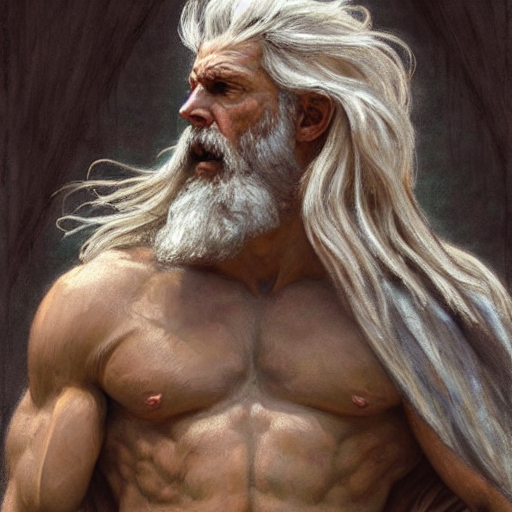

In [ ]:
image

## Whisper2

In [27]:
from transformers import pipeline

MODEL_NAME = "openai/whisper-large-v2"
device = 0

pipe = pipeline(
    task="automatic-speech-recognition",
    model=MODEL_NAME,
    device=device
)

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [29]:
text = pipe("01__01_Kapitola_1_.mp3")["text"]

text

' One Hot Book publishes an audiobook by Frederick Backman, A Man Named Ove.'